# Stellar Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read in data (assumes csv is in same folder as this notebook)
data = pd.read_csv('star_classification.csv')
data.shape

(100000, 18)

In [3]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
data_dictionary = {
    'obj_ID':'Object Identifier', 
    'alpha':'Right Ascension:the astronomical equivalent of longitude. Right ascension is the angular distance ofan object measured eastward from the First Point of Aries, also called the Vernal Equinox', 
    'delta': 'Declination: the astronomical equivalent of latitude. Declination is an angular distance of a pointnorth or south of the Celestial Equator, a projection of the Earth’s equator into space. Declination is measured in degrees from -90° to +90°.',
    'u': 'Ultraviolet, Effective Wavelength Midpoint λ(eff) = 365nm',
    'g': 'Green, Effective Wavelength Midpoint λ(eff) = 464nm',
    'r': 'Red, Effective Wavelength Midpoint λ(eff) = 658nm',
    'i': 'Infrared, Effective Wavelength Midpoint λ(eff) = 806nm',
    'z': 'Z, Effective Wavelength Midpoint λ(eff) = 900nm',
    'run_ID': 'Run Number',
    'rerun_ID': 'Rerun Number',
    'cam_col': 'Camera Column',
    'field_ID':'Field Number',
    'spec_obj_ID':'Object Identifier',
    'class': 'Output Class',
    'redshift': 'Red shift is a key concept for astronomers. The term can be understood literally - the wavelength of the light is stretched, so the light is seen as shifted towards the red part of the spectrum.',
    'plate': 'Plate Number',
    'MJD': 'Modified Julian Date',
    'fiber_ID': 'fiber ID'
    }

#### Photometric Letters

Each letter designates a section of light of the electromagnetic spectrum; these cover well the consecutive major groups, near-ultraviolet (NUV), visible light (centered on the V band), near-infrared (NIR) and part of mid-infrared (MIR).[a]

The letters are not standards, but are recognized by common agreement among astronomers and astrophysicists.

The use of U,B,V,R,I bands dates from the 1950s, being single-letter abbreviations.[b] With the advent of infrared detectors in the next decade, the J to N bands were labelled following on from near-infrared's closest-to-red band, I. Later the H band was inserted, then Z in the 1990s and finally Y, without changing earlier definitions. Hence, H is out of alphabetical order from its neighbours, while Z,Y are reversed from the alphabetical – higher-wavelength – sub-series which dominates current photometric bands.

In [5]:
display(data.describe())
display(data.info())

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

None

In [6]:
#Drop ID related columns
id_cols = ['rerun_ID','obj_ID','run_ID','field_ID','fiber_ID','spec_obj_ID']
data = data.drop(id_cols, axis = 1)

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'delta'}>,
        <AxesSubplot:title={'center':'u'}>],
       [<AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'i'}>],
       [<AxesSubplot:title={'center':'z'}>,
        <AxesSubplot:title={'center':'cam_col'}>,
        <AxesSubplot:title={'center':'redshift'}>],
       [<AxesSubplot:title={'center':'plate'}>,
        <AxesSubplot:title={'center':'MJD'}>, <AxesSubplot:>]],
      dtype=object)

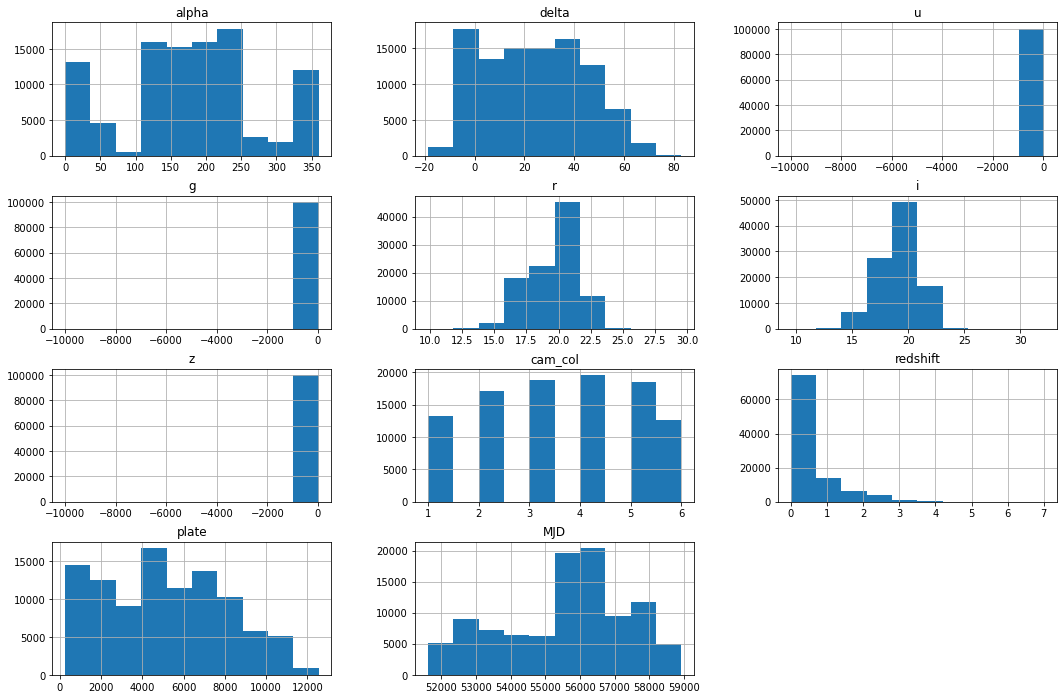

In [7]:
data.hist(figsize=(18,12))

In [8]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,0.019582,0.001667,-0.002554,0.019943
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,0.032565,0.031638,0.112329,0.107333
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.003548,0.014309,0.029997,0.031997
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.003508,0.022954,0.039443,0.040274
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.008480,0.433241,0.655243,0.671180
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.007615,0.492383,0.661640,0.672523
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.003365,0.030380,0.037813,0.037469
cam_col,0.019582,0.032565,0.003548,0.003508,0.008480,0.007615,0.003365,1.000000,0.000097,-0.001949,-0.006745
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,0.000097,1.000000,0.388641,0.387109
plate,-0.002554,0.112329,0.029997,0.039443,0.655243,0.661640,0.037813,-0.001949,0.388641,1.000000,0.970166


<Figure size 432x288 with 0 Axes>

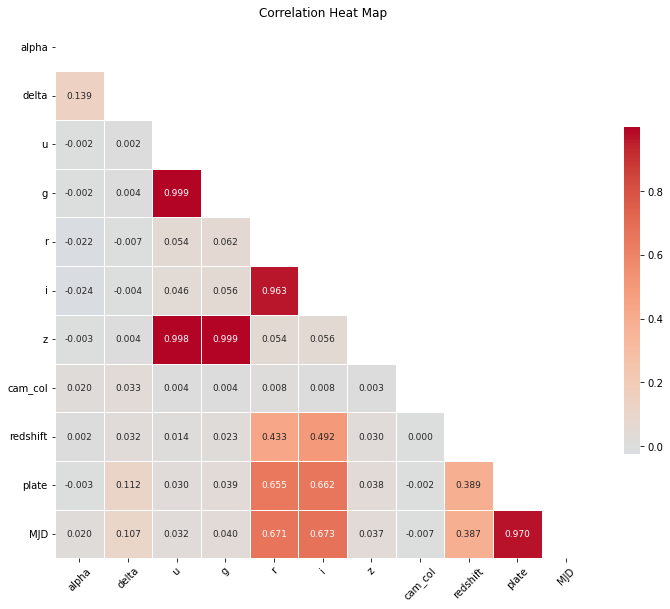

In [9]:
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# examine correlations
corr_chart(df_corr = data) 

<AxesSubplot:xlabel='class', ylabel='count'>

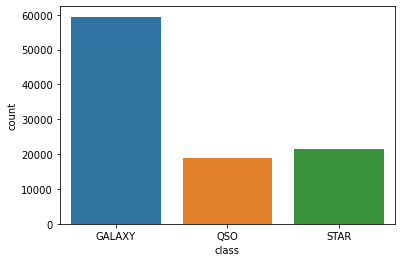

In [10]:
sns.countplot(x = 'class', data = data)

,u,g,r,i,z
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.980468,20.531387,19.645762,19.084854,18.668810
std,31.769291,31.750292,1.854760,1.757895,31.728152
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000
25%,20.352353,18.965230,18.135828,17.732285,17.460677
50%,22.179135,21.099835,20.125290,19.405145,19.004595
75%,23.687440,22.123767,21.044785,20.396495,19.921120
max,32.781390,31.602240,29.571860,32.141470,29.383740


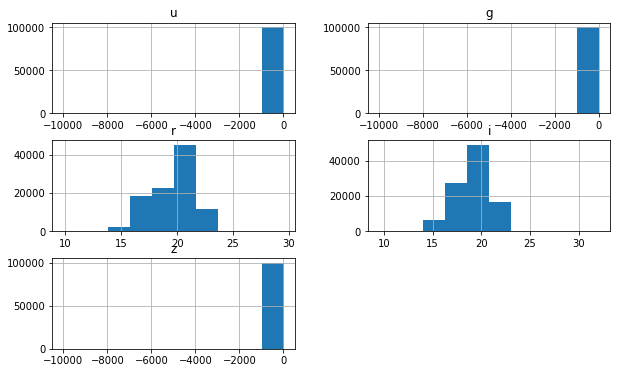

In [11]:
#Investigating UGRIZ

ugriz = data[['u','g','r','i','z']]
ugriz.hist(figsize= (10,6))

data[['u','g','r','i','z']].describe()

### We Probably Need to Scale tihs part of the data

In [12]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

#Going to scale UGRIZ columns. 
mms = MinMaxScaler()

data[['u','g','r','i','z']] = mms.fit_transform(data[['u','g','r','i','z']])


In [13]:
data[['u','g','r','i','z']].describe()

,u,g,r,i,z
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.998923,0.998896,0.497407,0.424097,0.998932
std,0.003167,0.003165,0.093913,0.077537,0.003164
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.998761,0.998740,0.420954,0.364438,0.998811
50%,0.998943,0.998953,0.521688,0.438225,0.998965
75%,0.999093,0.999055,0.568245,0.481951,0.999056
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

# Random Forest and Gradient Boost 

#### Random Forest

In [15]:
#Make Classes Numeric before training model

data['class'].replace(['GALAXY', 'STAR','QSO'],
                        [0, 1,2], inplace=True)

In [16]:
data['class'].value_counts()

0    59445
1    21594
2    18961
Name: class, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

X = data.drop(columns = ['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [18]:
#Random Forest 

def classifier_model(model):
    classifier = model()
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = round(classifier.score(X_test,y_test) * 100, 2)
    print(classification_report(y_test, y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE: ", mean_absolute_error(y_test,y_pred))
    print(str(acc) + ' percent')
    return classifier   

classifier_model(RandomForestClassifier)


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14948
           1       1.00      1.00      1.00      5362
           2       0.97      0.93      0.95      4690

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.98     25000
weighted avg       0.98      0.98      0.98     25000

RMSE:  0.2792131802046601
MAE:  0.03956
97.96 percent


RandomForestClassifier()

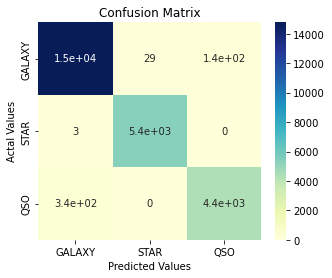

In [19]:
#Confusion Matrix for RF
from sklearn.metrics import confusion_matrix


clf = RandomForestClassifier().fit(X_train,y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['GALAXY','STAR','QSO'], 
                     columns = ['GALAXY','STAR','QSO'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,  cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


#### Gradient Boost

In [20]:
#Gradient Boost

def classifier_model(model):
    classifier = model()
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = round(classifier.score(X_test,y_test) * 100, 2)
    print(classification_report(y_test, y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE: ", mean_absolute_error(y_test,y_pred))
    print(str(acc) + ' percent')
    return classifier   

classifier_model(GradientBoostingClassifier)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14948
           1       1.00      1.00      1.00      5362
           2       0.97      0.91      0.94      4690

    accuracy                           0.98     25000
   macro avg       0.98      0.96      0.97     25000
weighted avg       0.98      0.98      0.98     25000

RMSE:  0.3062025473440742
MAE:  0.0476
97.55 percent


GradientBoostingClassifier()

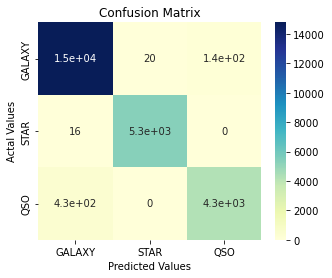

In [21]:
#Confusion Matrix for GB
from sklearn.metrics import confusion_matrix


gb_clf = GradientBoostingClassifier().fit(X_train,y_train)
gb_clf.predict(X_train)
y_pred = gb_clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['GALAXY','STAR','QSO'], 
                     columns = ['GALAXY','STAR','QSO'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,  cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


## Implementing Neural Network! -------- Verson 1

Following Documentation from: https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [349]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Activation, Dense, Flatten
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

In [350]:
X = data.drop(columns = ['class'])
y = data['class']

In [351]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [352]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.1)
model.compile(loss = "categorical_crossentropy", optimizer = opt)

In [353]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=11, activation='relu'))
    model.add(Dense(10, input_dim=11, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [354]:
from keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn=baseline_model, epochs=5, batch_size=5, verbose=1)

In [355]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)

In [356]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/5
18000/18000 [==============================] - 16s 868us/step - loss: 11915166720.0000 - accuracy: 0.5948
Epoch 2/5
18000/18000 [==============================] - 15s 860us/step - loss: 0.9579 - accuracy: 0.5948
Epoch 3/5
18000/18000 [==============================] - 15s 813us/step - loss: 0.9578 - accuracy: 0.5948
Epoch 4/5
18000/18000 [==============================] - 15s 825us/step - loss: 0.9578 - accuracy: 0.5948
Epoch 5/5
2000/2000 [==============================] - 2s 747us/step - loss: 0.9692 - accuracy: 0.5909
Epoch 1/5
18000/18000 [==============================] - 15s 845us/step - loss: 135641.7188 - accuracy: 0.5946
Epoch 2/5
18000/18000 [==============================] - 15s 858us/step - loss: 0.9584 - accuracy: 0.5946
Epoch 3/5
18000/18000 [==============================] - 16s 889us/step - loss: 0.9583 - accuracy: 0.5946
Epoch 4/5
18000/18000 [==============================] - 15s 848us/step - loss: 0.9580 - accuracy: 0.5946
Epoch 5/5
2000/2000 [=============

KeyboardInterrupt: 

## Implementing Artificial Neural Network! -------- Verson 2 (Works Way Better)

Following Classification From: https://www.analyticsvidhya.com/blog/2021/10/implementing-artificial-neural-networkclassification-in-python-from-scratch/

In [341]:
X = data.drop(columns = ['class'])
y = data['class']

In [342]:
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
y = np.array(LE1.fit_transform(y))

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [344]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [346]:
ann = tf.keras.models.Sequential()

In [347]:
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
ann.add(tf.keras.layers.Dense(units=3,activation="softmax"))
ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history = ann.fit(X_train,y_train,batch_size=32,epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4833 - accuracy: 0.8050 - val_loss: 0.2004 - val_accuracy: 0.9368
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2220 - accuracy: 0.9448 - val_loss: 0.1539 - val_accuracy: 0.9508
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1916 - accuracy: 0.9545 - val_loss: 0.1414 - val_accuracy: 0.9561
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1736 - accuracy: 0.9586 - val_loss: 0.1352 - val_accuracy: 0.9581
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1615 - accuracy: 0.9605 - val_loss: 0.1220 - val_accuracy: 0.9633
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1518 - accuracy: 0.9625 - val_loss: 0.1205 - val_accuracy: 0.9646
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1439 - accuracy: 0.9631 - val_loss: 0.1175 - val_accuracy:

# Analysis of Neural Network Results:

Similarities: 
- Used Label Encoders for Y
- Same Structure, Input layer: 10, 1st Hidden layer: 10, Output layer: 3
- Relu and Softmax Activation Functions
- Both use "Accuracy" as metric.
- Both are model = Sequential()

Differences:
- Applied Standard Scaler to Model 2
- Loss Function for model 1 was categorical_crossentropy, Loss Entropy for model 2 was sparse_categorical_crossentropy
- Optimizer for model 1 is SGD(lr=0.1), Optimizer for model 2 is Adam
- Batch size for model 1 is 5, Batch size for model 2 is 32


Analysis: The second model performs significantly better than the first model. It starts at higher initial accuracy, learns better and generally runs faster than model 1. The validation accuracy for model 2 after 10 epochs is 96.88%, whereas the accuracy for model 1 plateaus at 60% and learns much slower. 